<a href="https://colab.research.google.com/github/jonjonvps/LLM_Transformer/blob/main/Transformes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

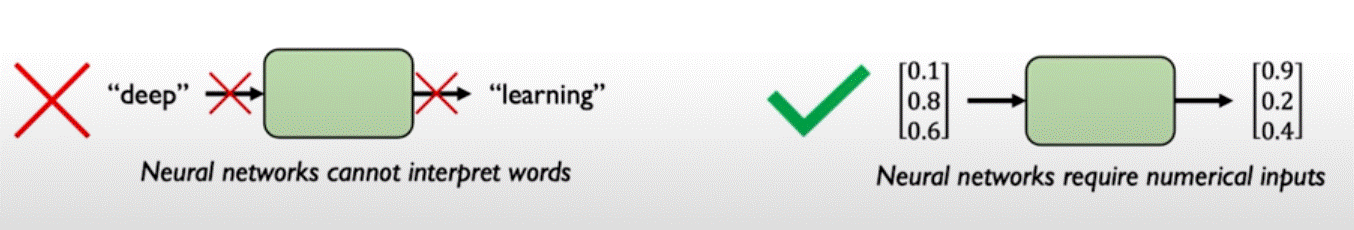

In [1]:
#@title Alimentando
texto = 'hoje você está focado em aprender!'
caracteres = sorted(list(set(texto)))
print(caracteres)
print('Tamanho do vocabulário: ',len(caracteres))

[' ', '!', 'a', 'c', 'd', 'e', 'f', 'h', 'j', 'm', 'n', 'o', 'p', 'r', 's', 't', 'v', 'á', 'ê']
Tamanho do vocabulário:  19


In [2]:
#@title Encode
letraParaIndex = {it:i for i,it in enumerate(caracteres)}
print(letraParaIndex)
encode = lambda s: [letraParaIndex[c] for c in s]
print(encode('vamos aprender'))

{' ': 0, '!': 1, 'a': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'h': 7, 'j': 8, 'm': 9, 'n': 10, 'o': 11, 'p': 12, 'r': 13, 's': 14, 't': 15, 'v': 16, 'á': 17, 'ê': 18}
[16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13]


In [3]:
#@title Decoder

indexParaLetra = {i:it for i,it in enumerate(caracteres)}
print(indexParaLetra)
decoder = lambda s: ''.join([indexParaLetra[c] for c in s])
print(decoder(encode('vamos aprender')))

{0: ' ', 1: '!', 2: 'a', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'h', 8: 'j', 9: 'm', 10: 'n', 11: 'o', 12: 'p', 13: 'r', 14: 's', 15: 't', 16: 'v', 17: 'á', 18: 'ê'}
vamos aprender


In [4]:
#@title Hot Encode
# Encoding por palavras

import pandas as pd
import numpy as np

texto = { 'texto':[
  'você está começando a aprender transformer',
  'tavez você esteja começando a gostar',
]}

texto = pd.DataFrame(texto)
texto

,texto
0,você está começando a aprender transformer
1,tavez você esteja começando a gostar


In [5]:
# transforma todo texto concatenado em uma matrix de ocorrencia de palavras
texto["texto"].str.get_dummies(" ")

,a,aprender,começando,esteja,está,gostar,tavez,transformer,você
0,1,1,1,0,1,0,0,1,1
1,1,0,1,1,0,1,1,0,1


In [6]:
#@title Tokenização eficiente
# https://github.com/openai/tiktoken

!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.7 MB/s eta 0:00:00


In [7]:
import tiktoken
enc = tiktoken.get_encoding("gpt2")
# mesma informação com menos dados
enc.encode("vamos aprender transformers")

[85, 321, 418, 2471, 13287, 6121, 364]

In [8]:
# Nosso encoder improvisado
print(encode('vamos aprender transformers'))

[16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14]


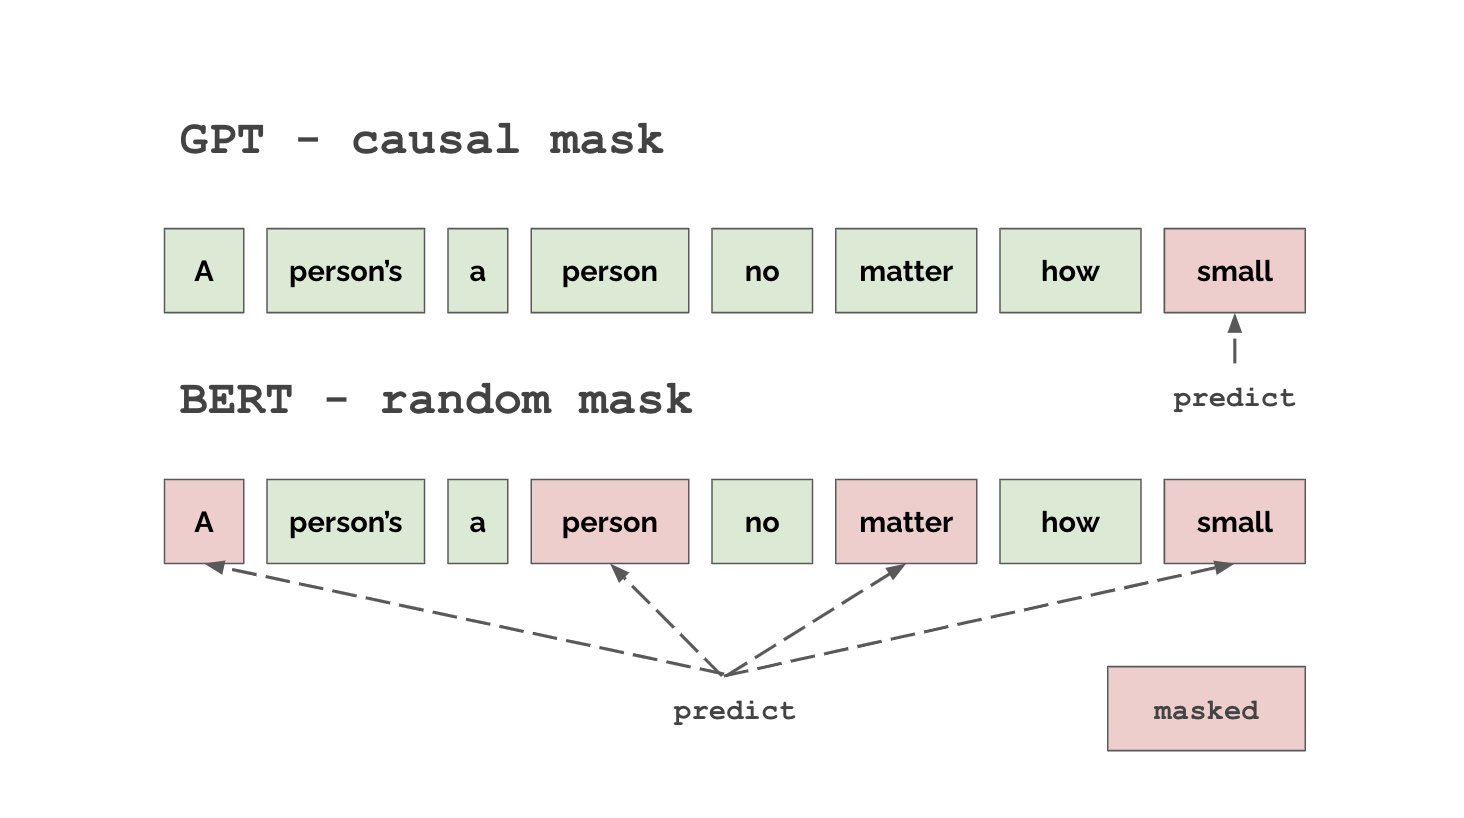

In [9]:
#@title Compreeender a proxima sequência baseado na anterior
texto = encode('vamos aprender transformers')
len(texto)
print(texto)

[16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14]


In [10]:
#@title GPT
for i in range(len(texto) - 1):
  x = texto[:i]
  y = texto[i]
  if x != []:
    print(f'Quando os dados forem: {x} o alvo é {y}')

Quando os dados forem: [16] o alvo é 2
Quando os dados forem: [16, 2] o alvo é 9
Quando os dados forem: [16, 2, 9] o alvo é 11
Quando os dados forem: [16, 2, 9, 11] o alvo é 14
Quando os dados forem: [16, 2, 9, 11, 14] o alvo é 0
Quando os dados forem: [16, 2, 9, 11, 14, 0] o alvo é 2
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2] o alvo é 12
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12] o alvo é 13
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13] o alvo é 5
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5] o alvo é 10
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10] o alvo é 4
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4] o alvo é 5
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5] o alvo é 13
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13] o alvo é 0
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0] o alvo é 15
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 

In [11]:
#@title BERT

from random import randint
for i in range(len(texto)):
  x = texto
  y = texto.copy()
  idx_mask = randint(0, len(texto) - 1)
  y[idx_mask] = '<mask>'
  print(f'Quando os dados forem: {x} o alvo é {y}')


Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14] o alvo é [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, '<mask>', 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14]
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14] o alvo é [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, '<mask>']
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14] o alvo é [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, '<mask>', 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14]
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14] o alvo é [16, 2, 9, 11, 14, 0, 2, '<mask>', 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14]
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13,

**BERT ROBERTA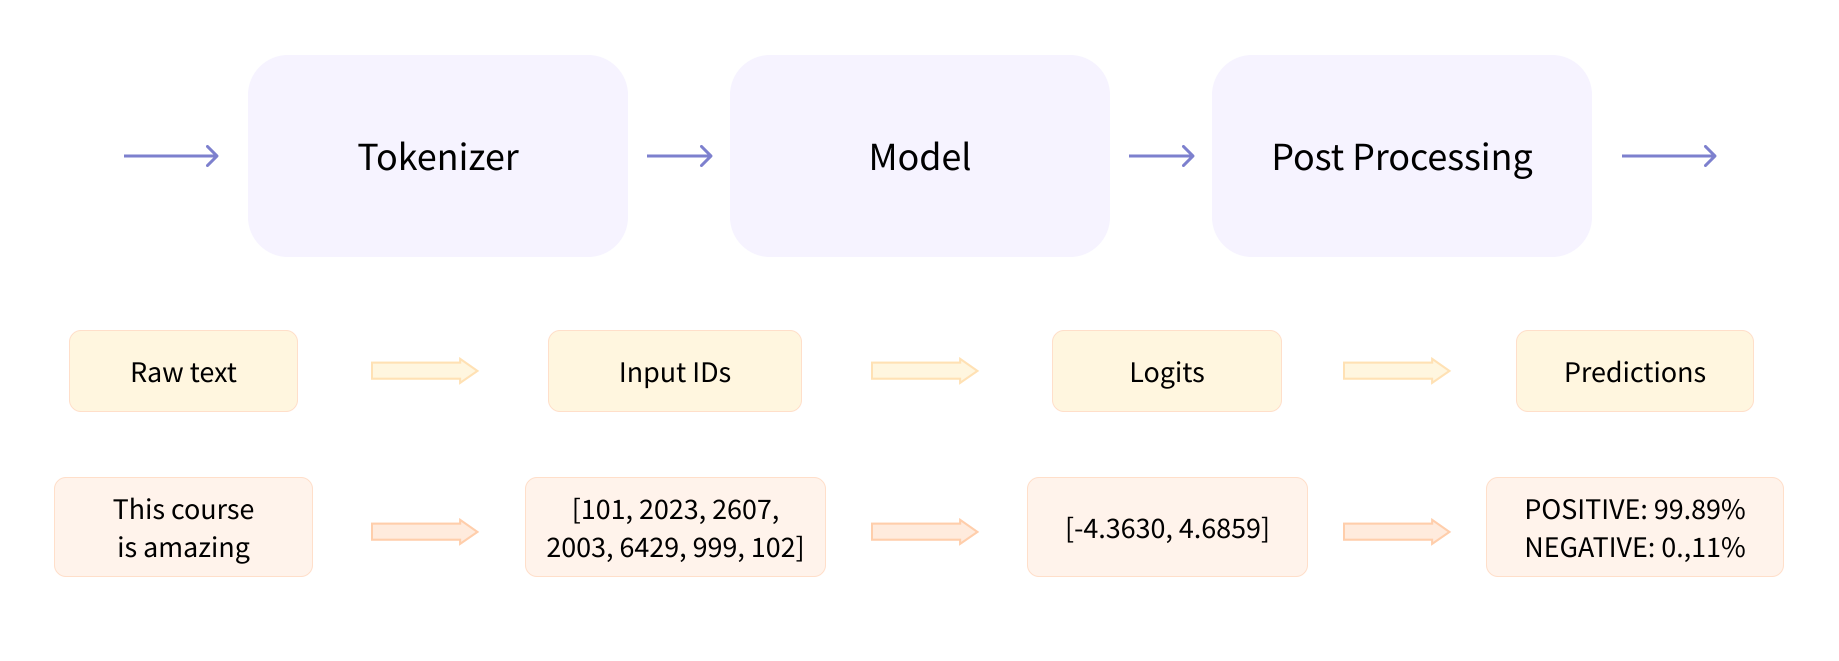**

In [12]:
#@title Criando um tokenizer
#https://huggingface.co/
!pip install transformers[torch]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [13]:
#precisamos de um corpus bem robusto, porém não tão gigante
!wget -O ./sample_data/crepusculoDosIdolos.txt https://raw.githubusercontent.com/mfmarlonferrari/NietzscheLLM/main/crepusculoDosIdolos.txt


--2025-03-22 19:25:08--  https://raw.githubusercontent.com/mfmarlonferrari/NietzscheLLM/main/crepusculoDosIdolos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162098 (158K) [text/plain]
Saving to: ‘./sample_data/crepusculoDosIdolos.txt’

./sample_data/crepu 100%[===================>] 158.30K  --.-KB/s    in 0.02s   

2025-03-22 19:25:09 (8.41 MB/s) - ‘./sample_data/crepusculoDosIdolos.txt’ saved [162098/162098]



In [14]:
PATH = './sample_data/'
dados_treino = 'crepusculoDosIdolos.txt'

In [15]:
from tokenizers import ByteLevelBPETokenizer
# recursividade contando as frequencias de pares de tokens, até atingir as frequencias minimas

tokenizer = ByteLevelBPETokenizer()
tokenizer.train(files=[f'{PATH}{dados_treino}'], vocab_size=52_000, min_frequency=2,
                special_tokens=['<s>', '<pad>', '</s>', '<unk>', '<mask>'])

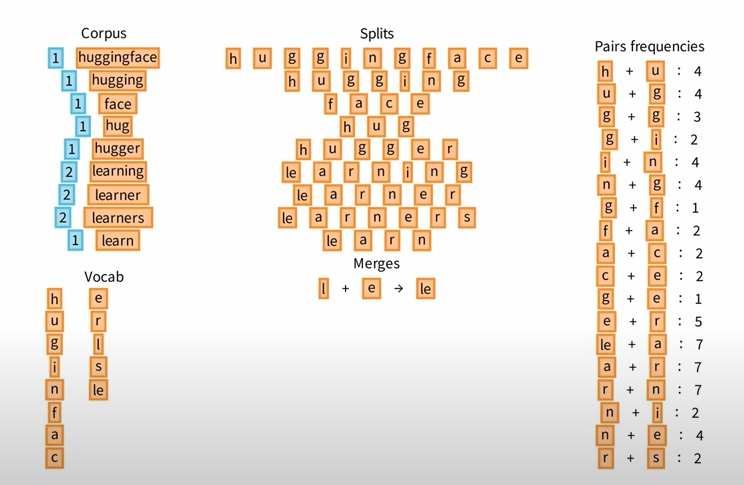

In [16]:
#@title Alguns testes

tokenizer.encode('Hoje é um novo dia!').ids

[44, 83, 570, 306, 300, 1714, 556, 5]

In [17]:
tokenizer.decode([44, 83, 570, 306, 300, 1714, 556, 5])

'Hoje é um novo dia!'

In [18]:
#neste momento, nosso modelo já possui um tokenizer construído a partir dos dados
#vocab.json, lista dos tokens ordenados por frequência - converte tokens para IDs
#merges.txt - mapeia textos para tokens

!rm -r ./sample_data/RAW_MODEL
!mkdir ./sample_data/RAW_MODEL
tokenizer.save_model(PATH+'RAW_MODEL')

rm: cannot remove './sample_data/RAW_MODEL': No such file or directory


['./sample_data/RAW_MODEL/vocab.json', './sample_data/RAW_MODEL/merges.txt']

In [19]:
# cria um tokenizer baseado na algoritmo BPE
'''
from tokenizers.implementations import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing

tokenizer = ByteLevelBPETokenizer(
    PATH+'RAW_MODEL/vocab.json',
    PATH+'RAW_MODEL/merges.txt'
)

tokenizer._tokenizer.post_processor = BertProcessing(
    ("</s>", tokenizer.token_to_id("</s>")),
    ("<s>", tokenizer.token_to_id("<s>")),
)
tokenizer.enable_truncation(max_length=512)
'''

'\nfrom tokenizers.implementations import ByteLevelBPETokenizer\nfrom tokenizers.processors import BertProcessing\n\ntokenizer = ByteLevelBPETokenizer(\n    PATH+\'RAW_MODEL/vocab.json\',\n    PATH+\'RAW_MODEL/merges.txt\'\n)\n\ntokenizer._tokenizer.post_processor = BertProcessing(\n    ("</s>", tokenizer.token_to_id("</s>")),\n    ("<s>", tokenizer.token_to_id("<s>")),\n)\ntokenizer.enable_truncation(max_length=512)\n'

In [20]:
#Usando nosso tokenizer
#https://huggingface.co/docs/transformers/tokenizer_summary

from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained(PATH+'RAW_MODEL', max_len=512)

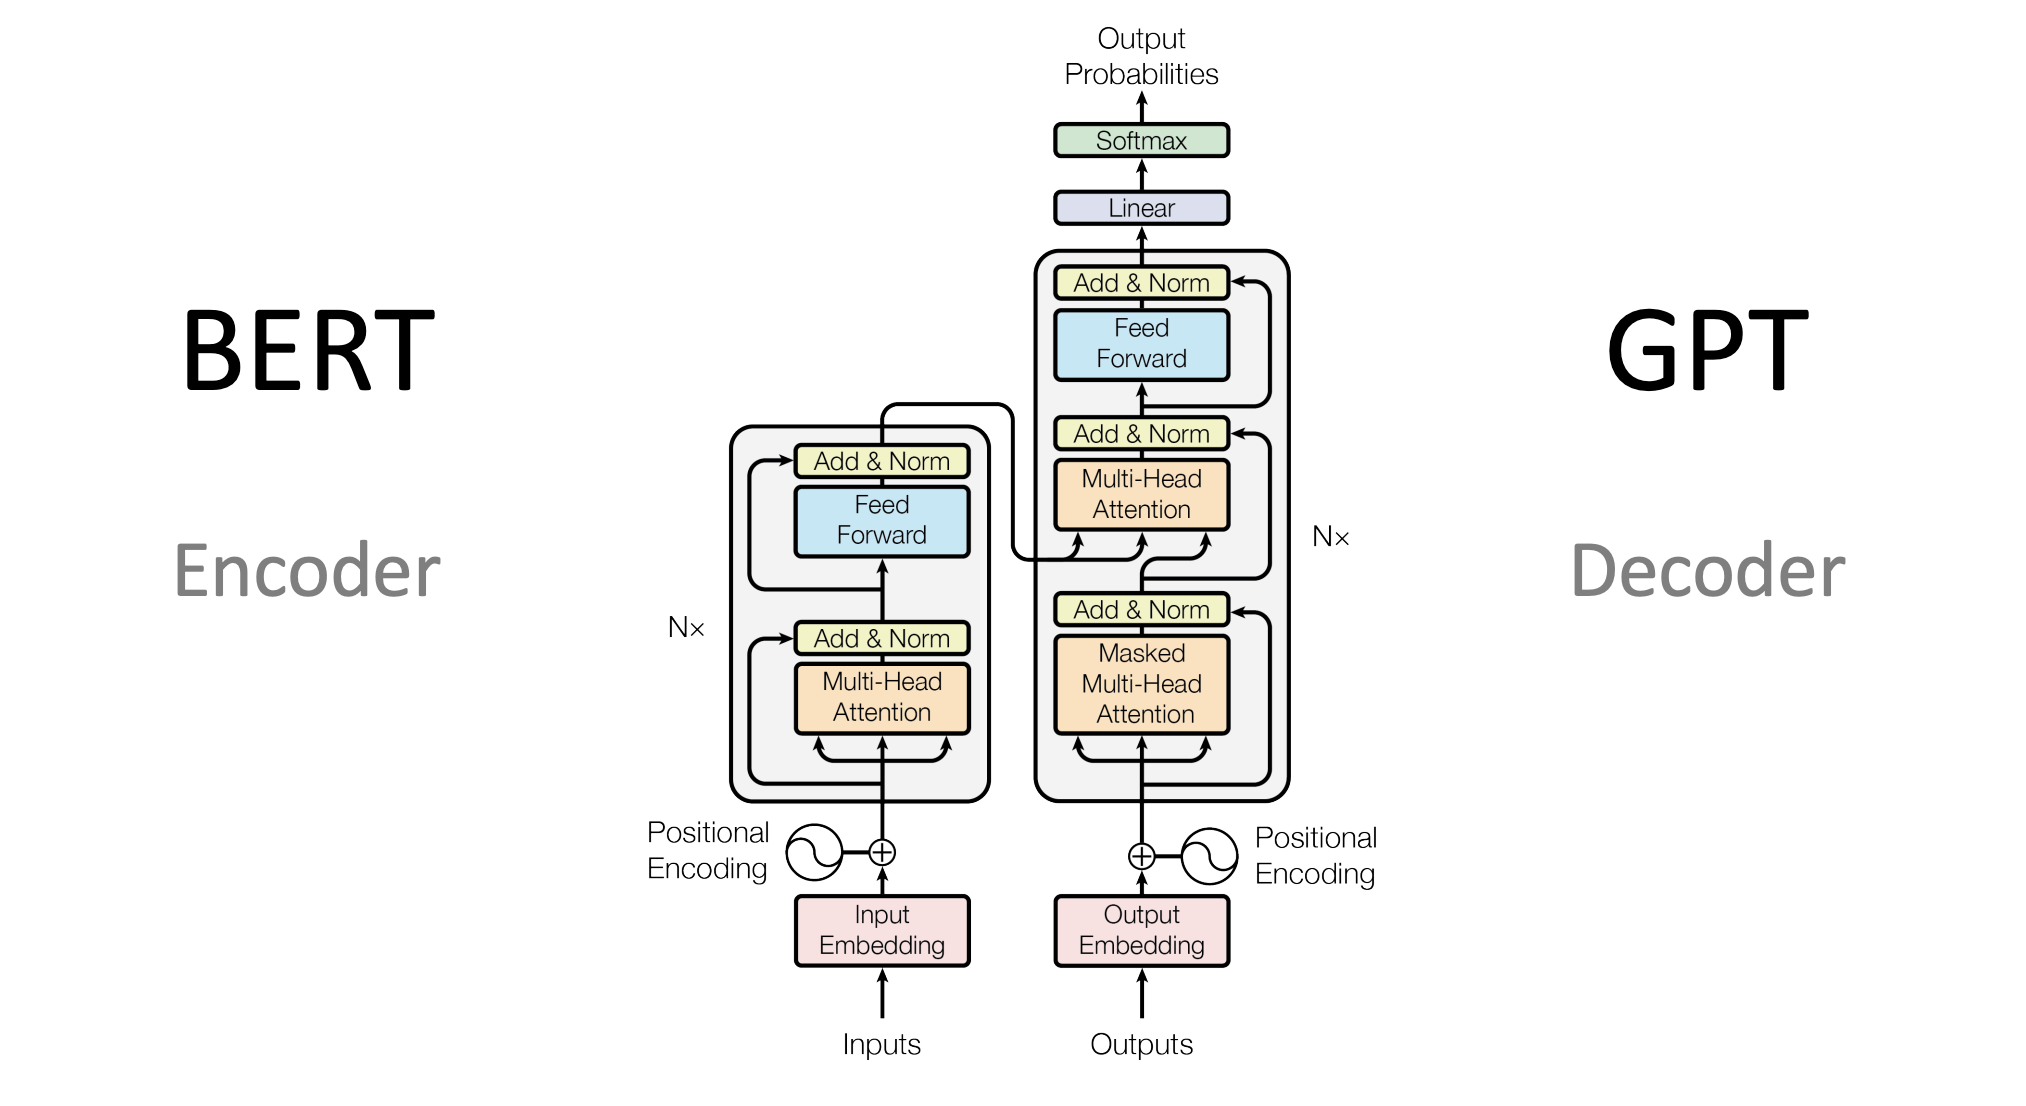

In [21]:
#@title Criando o transformer

from transformers import RobertaConfig

config = RobertaConfig(
    vocab_size=52_000,
    max_position_embeddings=512,
    num_attention_heads=12,
    num_hidden_layers=6,
    type_vocab_size=1,
)

from transformers import RobertaForMaskedLM
model = RobertaForMaskedLM(config=config)

In [22]:
# Quantos parâmetro tem nossa rede neural
model.num_parameters()

83502880

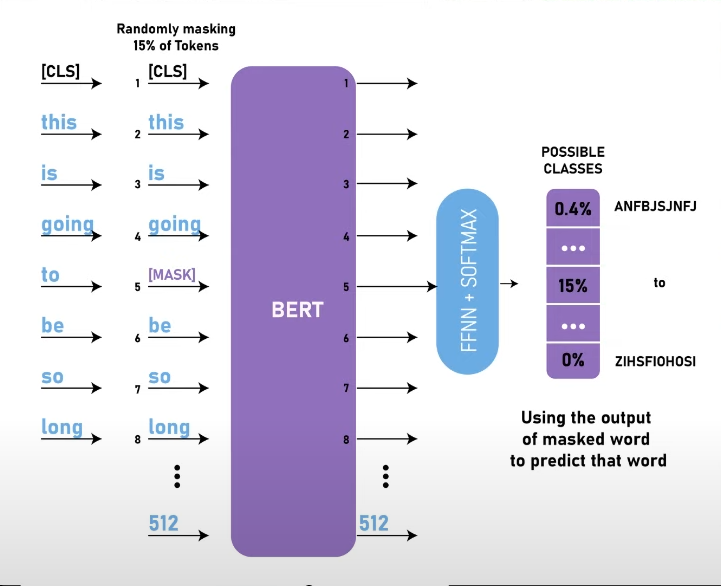

In [23]:
# forma simples de carregar um arquivo brutocomo Dataset
from transformers import LineByLineTextDataset

# vai pegar o arquivo bruto com o tokenizer que definiu, aplicar uma tokenização completa
# e crai um dataset para alimentar seu modelo de transformer
dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path=PATH+dados_treino,
    block_size=128,
)

/usr/local/lib/python3.11/dist-packages/transformers/data/datasets/language_modeling.py:119: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [24]:
# verificando
dataset.examples[:2]

[{'input_ids': tensor([   0,   69,  276, 1154,  341,  306,  277,  273,   73,  271,  446, 1058,
            18,  352,   35, 1155,  262, 1058,  300,  527, 2240,   35,    2])},
 {'input_ids': tensor([   0,   83,  358, 1142, 3664, 1816,  272,  687, 2688,  781, 4651,  315,
          2377,  271, 2768, 1635,  285,  811, 2375,  527,    2])}]

In [25]:
tokenizer.decode(dataset.examples[7]['input_ids'])

'<s>na escola bélica da vida — o que não me faz morrer me torna mais forte.</s>'

In [26]:
#@title treinando o modelo

'''
Data Collators são estratégias de se construir lotes de dados
para treinar o modelo. Cria listas de amostras a partir do dataset e
permite que o Pytorch aplique a backpropagation adequadamente.
Probability = probabilidade de mascarar tokens da entrada
'''
'''
Controlar quais posiçoes que ele vai usar, e comovai adicionar a
mascara antes da etapa de treino
'''
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.1
)

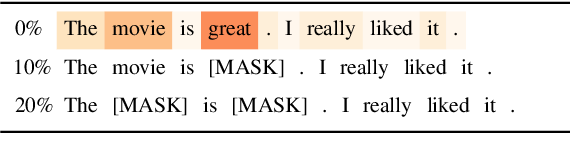

In [27]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir=PATH+'RAW_MODEL',
    overwrite_output_dir=True,
    num_train_epochs=1200,
    per_device_train_batch_size=64,
    save_steps=10_000,
    save_total_limit=2,
    prediction_loss_only=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
)

In [28]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: joaovictorpds16 (joaovictorpds16-universidade-de-bras-lia) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,6.548500
1000,5.233700
1500,4.238400
2000,3.252600
2500,2.402500
3000,1.719300
3500,1.235300
4000,0.920500
4500,0.745400


TrainOutput(global_step=4800, training_loss=2.7816710408528644, metrics={'train_runtime': 5367.3242, 'train_samples_per_second': 50.528, 'train_steps_per_second': 0.894, 'total_flos': 8992119855513600.0, 'train_loss': 2.7816710408528644, 'epoch': 1200.0})

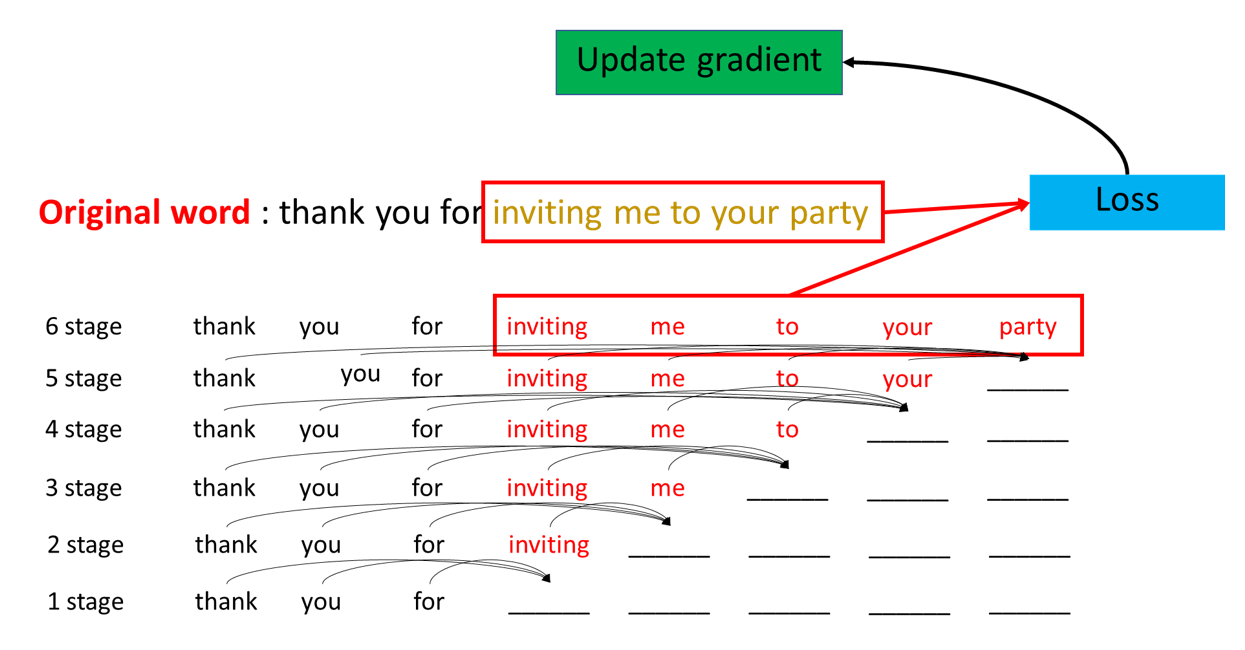

In [29]:
trainer.save_model(PATH+'RAW_MODEL')

In [30]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model=PATH+'RAW_MODEL',
    tokenizer=PATH+'RAW_MODEL'
)

Device set to use cuda:0


In [31]:
texto = 'Digo que o amor é <mask>'
fill_mask(texto)

[{'score': 0.2648981213569641,
  'token': 35,
  'token_str': '?',
  'sequence': 'Digo que o amor é?'},
 {'score': 0.17271649837493896,
  'token': 271,
  'token_str': ' de',
  'sequence': 'Digo que o amor é de'},
 {'score': 0.018942104652523994,
  'token': 334,
  'token_str': ' os',
  'sequence': 'Digo que o amor é os'},
 {'score': 0.017379792407155037,
  'token': 262,
  'token_str': ' a',
  'sequence': 'Digo que o amor é a'},
 {'score': 0.013245461508631706,
  'token': 961,
  'token_str': ' humanidade',
  'sequence': 'Digo que o amor é humanidade'}]

In [32]:
texto = 'O <mask> da moral: basear na lógica dos fracos'
fill_mask(texto)

[{'score': 0.101563960313797,
  'token': 800,
  'token_str': ' erro',
  'sequence': 'O erro da moral: basear na lógica dos fracos'},
 {'score': 0.08523283153772354,
  'token': 276,
  'token_str': ' o',
  'sequence': 'O o da moral: basear na lógica dos fracos'},
 {'score': 0.025379056110978127,
  'token': 3756,
  'token_str': 'queles',
  'sequence': 'Oqueles da moral: basear na lógica dos fracos'},
 {'score': 0.021608589217066765,
  'token': 389,
  'token_str': 'res',
  'sequence': 'Ores da moral: basear na lógica dos fracos'},
 {'score': 0.01817001961171627,
  'token': 279,
  'token_str': 'ão',
  'sequence': 'Oão da moral: basear na lógica dos fracos'}]

In [33]:
texto = 'Digo-lhes: <mask> é uma dama e um oponente'
fill_mask(texto)

[{'score': 0.27450165152549744,
  'token': 262,
  'token_str': ' a',
  'sequence': 'Digo-lhes: a é uma dama e um oponente'},
 {'score': 0.08394484221935272,
  'token': 414,
  'token_str': ' —',
  'sequence': 'Digo-lhes: — é uma dama e um oponente'},
 {'score': 0.029125912114977837,
  'token': 18,
  'token_str': '.',
  'sequence': 'Digo-lhes:. é uma dama e um oponente'},
 {'score': 0.02229059860110283,
  'token': 1088,
  'token_str': ' filósofos',
  'sequence': 'Digo-lhes: filósofos é uma dama e um oponente'},
 {'score': 0.021420320495963097,
  'token': 1675,
  'token_str': ' aprese',
  'sequence': 'Digo-lhes: aprese é uma dama e um oponente'}]